In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import folium

In [2]:
coronaDF = pd.read_csv('./data/covid_19_clean_complete.csv')
coronaDF.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


# 1.기본적인 데이터 조회 및 통계

In [3]:
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26400 entries, 0 to 26399
Data columns (total 8 columns):
Province/State    8000 non-null object
Country/Region    26400 non-null object
Lat               26400 non-null float64
Long              26400 non-null float64
Date              26400 non-null object
Confirmed         26400 non-null int64
Deaths            26400 non-null int64
Recovered         26400 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.6+ MB


In [4]:
coronaDF.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,26400.000000,26400.000000,2.640000e+04,26400.000000,26400.000000
mean,21.374285,22.860921,2.789315e+03,179.371477,716.273447
std,24.754116,70.377900,2.681237e+04,1849.994211,5919.897092
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.969250,-16.237775,0.000000e+00,0.000000,0.000000
50%,23.659750,20.972650,8.000000e+00,0.000000,0.000000
75%,41.166075,78.750000,2.230000e+02,3.000000,25.000000
max,71.706900,178.065000,1.069424e+06,62996.000000,153947.000000


In [5]:
# 결측치 확인
coronaDF.isnull().sum()

Province/State    18400
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

ㄴ다른 데이터들은 결측값이 하나도 없지만 도시명이 많이 비어있음을 확인할 수 있다.

In [6]:
# 오브젝트 타입의 날짜 데이터(Date)를 데이트 타입으로 바꾸기
coronaDF['Date'] = pd.to_datetime(coronaDF['Date'])
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26400 entries, 0 to 26399
Data columns (total 8 columns):
Province/State    8000 non-null object
Country/Region    26400 non-null object
Lat               26400 non-null float64
Long              26400 non-null float64
Date              26400 non-null datetime64[ns]
Confirmed         26400 non-null int64
Deaths            26400 non-null int64
Recovered         26400 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.6+ MB


In [7]:
coronaDF.head(1) #데이터 타입 변환 확인

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0,0,0


In [8]:
# 최신일자 기준의 새로운 데이터셋 정의하기
latestDF = coronaDF[coronaDF['Date'] == max(coronaDF['Date'])]
latestDF.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
26136,NaN,Afghanistan,33.0000,65.0000,2020-04-30,2171,64,260
26137,NaN,Albania,41.1533,20.1683,2020-04-30,773,31,470
26138,NaN,Algeria,28.0339,1.6596,2020-04-30,4006,450,1779
26139,NaN,Andorra,42.5063,1.5218,2020-04-30,745,42,468
26140,NaN,Angola,-11.2027,17.8739,2020-04-30,27,2,7


# 2. 프레임을 만들어 데이터 정렬하기

In [9]:
latest_country_sum = latestDF.groupby('Country/Region')['Confirmed','Deaths','Recovered'
                                                       ].sum().reset_index()
latest_country_sum = latest_country_sum.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
latest_country_sum.head(10)
# reset_index(drop=True) 에 의해 원래 인덱스는 초기화되고 변경 이후를 기준으로 새롭게 인덱스 부여

,Country/Region,Confirmed,Deaths,Recovered
0,US,1069424,62996,153947
1,Spain,213435,24543,112050
2,Italy,205463,27967,75945
3,United Kingdom,172481,26842,859
4,France,167299,24410,50380
5,Germany,163009,6623,123500
6,Turkey,120204,3174,48886
7,Russia,106498,1073,11619
8,Iran,94640,6028,75103
9,Brazil,87187,6006,35935


In [10]:
latest_country_sum.sort_values(by='Confirmed', ascending=False).reset_index(drop=True).style #.style로 전체 출력

,Country/Region,Confirmed,Deaths,Recovered
0,US,1069424,62996,153947
1,Spain,213435,24543,112050
2,Italy,205463,27967,75945
3,United Kingdom,172481,26842,859
4,France,167299,24410,50380
5,Germany,163009,6623,123500
6,Turkey,120204,3174,48886
7,Russia,106498,1073,11619
8,Iran,94640,6028,75103
9,Brazil,87187,6006,35935


In [11]:
# 확진자 프레임 형성 및 시각화
latest_country_sum.sort_values(by='Confirmed', 
                               ascending=False).head(20).style.background_gradient(cmap='Blues')

,Country/Region,Confirmed,Deaths,Recovered
0,US,1069424,62996,153947
1,Spain,213435,24543,112050
2,Italy,205463,27967,75945
3,United Kingdom,172481,26842,859
4,France,167299,24410,50380
5,Germany,163009,6623,123500
6,Turkey,120204,3174,48886
7,Russia,106498,1073,11619
8,Iran,94640,6028,75103
9,Brazil,87187,6006,35935


In [12]:
# 사망자 프레임 형성 및 시각화
latest_country_sum.sort_values(by='Deaths', 
                               ascending=False).head(20).style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,US,1069424,62996,153947
2,Italy,205463,27967,75945
3,United Kingdom,172481,26842,859
1,Spain,213435,24543,112050
4,France,167299,24410,50380
12,Belgium,48519,7594,11576
5,Germany,163009,6623,123500
8,Iran,94640,6028,75103
9,Brazil,87187,6006,35935
13,Netherlands,39507,4811,125


In [13]:
# 회복자 프레임 형성 및 시각화
latest_country_sum.sort_values(by='Recovered', 
                               ascending=False).head(20).style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Deaths,Recovered
0,US,1069424,62996,153947
5,Germany,163009,6623,123500
1,Spain,213435,24543,112050
2,Italy,205463,27967,75945
10,China,83956,4637,75902
8,Iran,94640,6028,75103
4,France,167299,24410,50380
6,Turkey,120204,3174,48886
9,Brazil,87187,6006,35935
16,Switzerland,29586,1737,23400


# 3. 그래프를 통해 시각화하여 나타내기

In [27]:
data_status = coronaDF.groupby('Date')['Confirmed','Deaths','Recovered'].sum()
data_status.sort_index()
data_status.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,35
2020-01-25,1434,42,38
2020-01-26,2118,56,51


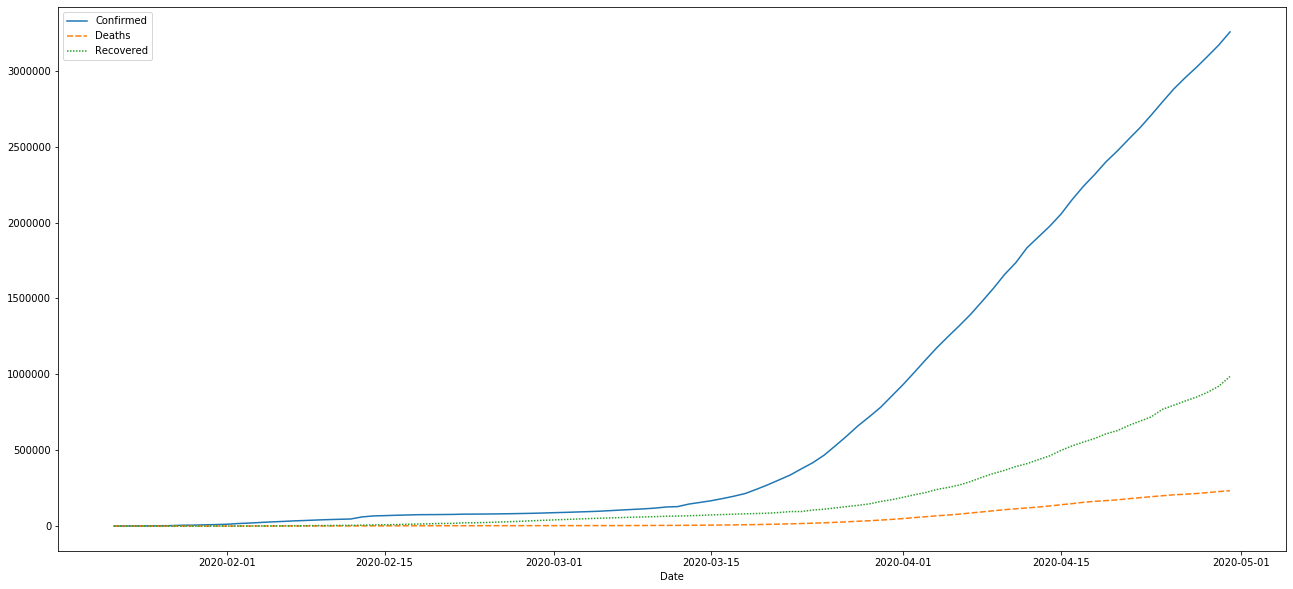

In [28]:
plt.figure(figsize=(22,10))
sns.lineplot(data=a)

# 한국 코로나 현황 및 추세 확인하기

In [43]:
coronaDF_korea = coronaDF[coronaDF['Country/Region'] == 'South Korea']
coronaDF_korea = coronaDF_korea.reset_index(drop=True)
coronaDF_korea.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,South Korea,36.0,128.0,2020-01-22,1,0,0
1,NaN,South Korea,36.0,128.0,2020-01-23,1,0,0
2,NaN,South Korea,36.0,128.0,2020-01-24,2,0,0
3,NaN,South Korea,36.0,128.0,2020-01-25,2,0,0
4,NaN,South Korea,36.0,128.0,2020-01-26,3,0,0


In [41]:
# 가장 최근 한국의 코로나 현황
coronaDF_korea[coronaDF_korea['Date'] == max(coronaDF_korea['Date'])]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
4,NaN,South Korea,36.0,128.0,2020-01-26,3,0,0


In [48]:
coronaDF_korea_2 = coronaDF_korea[['Date','Confirmed','Deaths','Recovered']]
coronaDF_korea_2 = coronaDF_korea_2.set_index('Date')
coronaDF_korea_2.head(10)

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,3,0,0
2020-01-27,4,0,0
2020-01-28,4,0,0
2020-01-29,4,0,0
2020-01-30,4,0,0


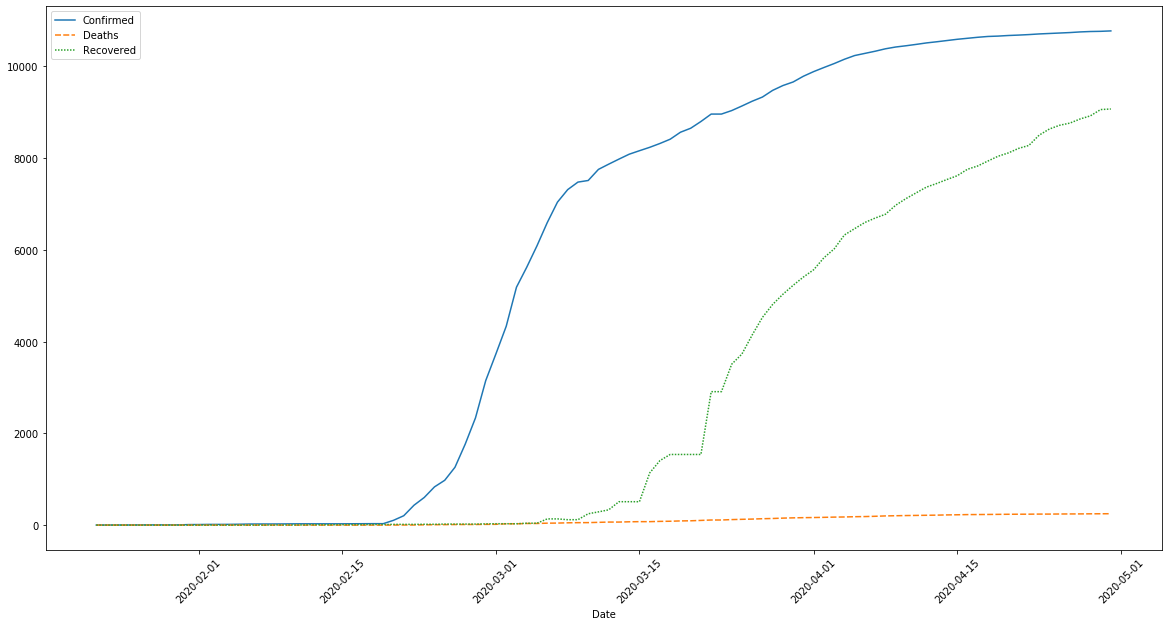

In [49]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.lineplot(data=coronaDF_korea_2)

1,2월 초까지 한자리 수의 확진자를 기록하다가 2월 중순 신천지 사태로 폭발적인 확진자 수가 발생한 정황과 정확히 일치한다.

# 세계 지도에 코로나 감염기록 표시하기

In [17]:
import folium

In [54]:
folium.Map(location=[37.5643011, 126.976572], zoom_start=12)

# 06. Ch 02. 전세계 코로나 바이러스 감염 지도 표시 - 02.

In [23]:
latestDF.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
26136,NaN,Afghanistan,33.0000,65.0000,2020-04-30,2171,64,260
26137,NaN,Albania,41.1533,20.1683,2020-04-30,773,31,470
26138,NaN,Algeria,28.0339,1.6596,2020-04-30,4006,450,1779
26139,NaN,Andorra,42.5063,1.5218,2020-04-30,745,42,468
26140,NaN,Angola,-11.2027,17.8739,2020-04-30,27,2,7


In [74]:
m = folium.Map(location=[0,0], zoom_start=3)
for n in latestDF.index:
    folium.CircleMarker([latestDF['Lat'][n],latestDF['Long'][n]], 
                        radius=int(latestDF['Confirmed'][n]/10000), 
                        color='red', 
                        fill=True,
                        fill_color='red',
                        popup=latestDF['Country/Region'][n]+"\n Confirmed : "+str(latestDF['Confirmed'][n])
                       ).add_to(m)
m